In [1]:
import pandas as pd
import numpy as np

df1 = pd.read_excel('附件.xlsx', sheet_name=0)
df1_valid = pd.read_excel('表1-填补缺失值.xlsx')
df2 = pd.read_excel('附件.xlsx', sheet_name=1)
df2_valid = pd.read_excel('文物样品信息汇总-填补缺失值.xlsx')
df3 = pd.read_excel('附件.xlsx', sheet_name=2)

In [11]:
df_whe = df2_valid[df2_valid.表面风化=='风化'].drop([23,25,29,30,44,45,48,53,56,60])
df_no_whe = pd.concat([df2_valid[df2_valid.表面风化=='无风化'],df2_valid.loc[[23,25,29,30,44,45,48,53,56,60]]]).sort_index()

In [155]:
Y_whe = df_whe.类型
Y_no_whe = df_no_whe.类型
X_whe = df_whe.drop(['文物编号','文物采样点','类型','表面风化','纹饰','颜色'],axis=1)
X_no_whe = df_no_whe.drop(['文物编号','文物采样点','类型','表面风化','纹饰','颜色'],axis=1)

In [100]:
from sklearn import tree
from sklearn.model_selection import train_test_split
Xtrain_whe, Xtest_whe, Ytrain_whe, Ytest_whe = train_test_split(X_whe, Y_whe, test_size=0.2)
Xtrain_no_whe, Xtest_no_whe, Ytrain_no_whe, Ytest_no_whe = train_test_split(X_no_whe, Y_no_whe, test_size=0.2)

有风化，不排除铅钡尝试

In [101]:
clf_whe = tree.DecisionTreeClassifier().fit(Xtrain_whe, Ytrain_whe)
clf_whe.score(Xtest_whe,Ytest_whe)

1.0

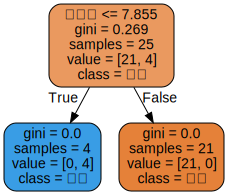

In [102]:
import graphviz
# 这个特征名就是刚才英文翻译成中文了
feature_name = ['二氧化硅','氧化钠','氧化钾','氧化钙','氧化镁','氧化铝','氧化铁','氧化铜','氧化铅','氧化钡','五氧化二磷','氧化锶','氧化锡','二氧化硫']
# filled：填充颜色，不纯度越低越深
# rounded：圆角矩形
dot_data = tree.export_graphviz(clf_whe
                                ,feature_names = feature_name
                                ,class_names=["铅钡","高钾"]
                                ,filled=True
                                ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

无风化，不排除铅尝试

In [103]:
clf_no_whe = tree.DecisionTreeClassifier().fit(Xtrain_no_whe, Ytrain_no_whe)
clf_no_whe.score(Xtest_no_whe,Ytest_no_whe)

1.0

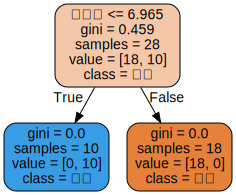

In [105]:
import graphviz
# 这个特征名就是刚才英文翻译成中文了
feature_name = ['二氧化硅','氧化钠','氧化钾','氧化钙','氧化镁','氧化铝','氧化铁','氧化铜','氧化铅','氧化钡','五氧化二磷','氧化锶','氧化锡','二氧化硫']
# filled：填充颜色，不纯度越低越深
# rounded：圆角矩形
dot_data = tree.export_graphviz(clf_no_whe
                                ,feature_names = feature_name
                                ,class_names=["铅钡","高钾"]
                                ,filled=True
                                ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

去除铅尝试

In [186]:
X_whe_dropPb = X_whe.drop('氧化铅(PbO)',axis=1)

In [187]:
Xtrain_whe_dropPb, Xtest_whe_dropPb, Ytrain_whe_dropPb, Ytest_whe_dropPb = train_test_split(X_whe_dropPb, Y_whe, test_size=0.2)

In [188]:
clf_whe_dropPb = tree.DecisionTreeClassifier().fit(Xtrain_whe_dropPb, Ytrain_whe_dropPb)
clf_whe_dropPb.score(Xtest_whe_dropPb, Ytest_whe_dropPb)

1.0

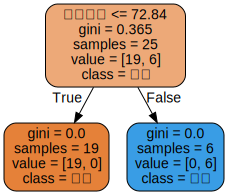

In [189]:
import graphviz

# 这个特征名就是刚才英文翻译成中文了
feature_name = ['二氧化硅', '氧化钠', '氧化钾', '氧化钙', '氧化镁', '氧化铝', '氧化铁', '氧化铜', '氧化钡', '五氧化二磷', '氧化锶', '氧化锡', '二氧化硫']
# filled：填充颜色，不纯度越低越深
# rounded：圆角矩形
dot_data = tree.export_graphviz(clf_whe_dropPb
                                , feature_names=feature_name
                                , class_names=["铅钡", "高钾"]
                                , filled=True
                                , rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

In [198]:
X_no_whe_dropPb = X_no_whe.drop('氧化铅(PbO)',axis=1)
Xtrain_no_whe_dropPb, Xtest_no_whe_dropPb, Ytrain_no_whe_dropPb, Ytest_no_whe_dropPb = train_test_split(X_no_whe_dropPb, Y_no_whe, test_size=0.2,random_state=2022)

In [199]:
clf_no_whe_dropPb = tree.DecisionTreeClassifier(random_state=2022).fit(Xtrain_no_whe_dropPb, Ytrain_no_whe_dropPb)
clf_no_whe_dropPb.score(Xtest_no_whe_dropPb, Ytest_no_whe_dropPb)

0.8571428571428571

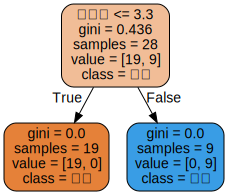

In [200]:
import graphviz

# 这个特征名就是刚才英文翻译成中文了
feature_name = ['二氧化硅', '氧化钠', '氧化钾', '氧化钙', '氧化镁', '氧化铝', '氧化铁', '氧化铜', '氧化钡', '五氧化二磷', '氧化锶', '氧化锡', '二氧化硫']
# filled：填充颜色，不纯度越低越深
# rounded：圆角矩形
dot_data = tree.export_graphviz(clf_no_whe_dropPb
                                , feature_names=feature_name
                                , class_names=["铅钡", "高钾"]
                                , filled=True
                                , rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

有风化，去除铅、二氧化硅

In [202]:
# X_whe_dropPb_dropSiO2 = X_no_whe_dropPb.drop('二氧化硅(SiO2)', axis=1)
# X_whe_dropPb_dropSiO2

In [201]:
# X_whe_dropPb_dropSiO2 = X_whe_dropPb.drop('二氧化硅(SiO2)', axis=1)
# Xtrain_whe_dropPb_dropSiO2, Xtest_whe_dropPb_dropSiO2, Ytrain_whe_dropPb_dropSiO2, Ytest_whe_dropPb_dropSiO2 = train_test_split(X_whe_dropPb_dropSiO2, Y_whe,test_size=0.2)
# clf_whe_dropPb_dropSiO2 = tree.DecisionTreeClassifier().fit(Xtrain_whe_dropPb_dropSiO2, Ytrain_whe_dropPb_dropSiO2)
# print(clf_whe_dropPb_dropSiO2.score(Xtest_whe_dropPb_dropSiO2, Ytest_whe_dropPb_dropSiO2))
# import graphviz
# # 这个特征名就是刚才英文翻译成中文了
# feature_name = ['二氧化硅', '氧化钠', '氧化钾', '氧化钙', '氧化镁', '氧化铝', '氧化铁', '氧化铜', '氧化钡', '五氧化二磷', '氧化锶', '氧化锡']
# # filled：填充颜色，不纯度越低越深
# # rounded：圆角矩形
# dot_data = tree.export_graphviz(clf_whe_dropPb_dropSiO2
#                                 , feature_names=feature_name
#                                 , class_names=["铅钡", "高钾"]
#                                 , filled=True
#                                 , rounded=True
#                                 )
# graph = graphviz.Source(dot_data)
# graph

随机森林尝试

In [253]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
Xtrain_whe, Xtest_whe, Ytrain_whe, Ytest_whe = train_test_split(X_whe, Y_whe, test_size=0.2,random_state=400)
Xtrain_no_whe, Xtest_no_whe, Ytrain_no_whe, Ytest_no_whe = train_test_split(X_no_whe, Y_no_whe, test_size=0.2,random_state=300)
le1 = LabelEncoder().fit(Ytrain_whe)
rfr1 = RandomForestRegressor(random_state=2022, n_estimators=100)
rfr1 = rfr1.fit(Xtrain_whe, le1.transform(Ytrain_whe))
score1 = rfr1.score(Xtest_whe, le1.transform(Ytest_whe))
print(score1)
le12 = LabelEncoder().fit(Ytrain_no_whe)
rfr2 = RandomForestRegressor(random_state=2022, n_estimators=100)
rfr2 = rfr2.fit(Xtrain_no_whe, le1.transform(Ytrain_no_whe))
score2 = rfr2.score(Xtest_no_whe, le1.transform(Ytest_no_whe))
print(score2)

0.9988333333333334
1.0


In [254]:
pd.Series(rfr1.feature_importances_,index=X_whe.columns).sort_values(ascending=False)

氧化铅(PbO)       0.515152
二氧化硅(SiO2)     0.444444
氧化钡(BaO)       0.030303
氧化锶(SrO)       0.010101
氧化钠(Na2O)      0.000000
氧化钾(K2O)       0.000000
氧化钙(CaO)       0.000000
氧化镁(MgO)       0.000000
氧化铝(Al2O3)     0.000000
氧化铁(Fe2O3)     0.000000
氧化铜(CuO)       0.000000
五氧化二磷(P2O5)    0.000000
氧化锡(SnO2)      0.000000
二氧化硫(SO2)      0.000000
dtype: float64

In [255]:
pd.Series(rfr2.feature_importances_,index=X_no_whe.columns).sort_values(ascending=False)

氧化铅(PbO)       0.58
氧化钡(BaO)       0.22
氧化钾(K2O)       0.19
氧化钙(CaO)       0.01
二氧化硅(SiO2)     0.00
氧化钠(Na2O)      0.00
氧化镁(MgO)       0.00
氧化铝(Al2O3)     0.00
氧化铁(Fe2O3)     0.00
氧化铜(CuO)       0.00
五氧化二磷(P2O5)    0.00
氧化锶(SrO)       0.00
氧化锡(SnO2)      0.00
二氧化硫(SO2)      0.00
dtype: float64

聚类

In [142]:
from sklearn.preprocessing import MinMaxScaler
df2_k_cc = df2_valid[df2_valid.类型=='高钾'].drop(['文物编号','文物采样点','纹饰','类型','颜色','表面风化'],axis=1)
df2_k_cc_mm = pd.DataFrame(MinMaxScaler().fit(df2_k_cc).transform(df2_k_cc), columns=df2_k_cc.columns)

In [147]:
(df2_k_cc_mm.std() / df2_k_cc_mm.mean()).sort_values(ascending=False)

氧化锡(SnO2)      4.242641
氧化钠(Na2O)      2.349727
二氧化硫(SO2)      2.318819
氧化钡(BaO)       2.109934
氧化铅(PbO)       1.873398
氧化锶(SrO)       1.579158
五氧化二磷(P2O5)    1.245319
氧化铁(Fe2O3)     1.138014
氧化镁(MgO)       0.906754
氧化钙(CaO)       0.860371
氧化钾(K2O)       0.829120
二氧化硅(SiO2)     0.820393
氧化铝(Al2O3)     0.724489
氧化铜(CuO)       0.692274
dtype: float64

In [258]:
df2_k_cc_cluster = df2_k_cc[['氧化锡(SnO2)','氧化钠(Na2O)','二氧化硫(SO2)','氧化铅(PbO)','氧化钡(BaO)']]
df2_k_cc_cluster

,氧化锡(SnO2),氧化钠(Na2O),二氧化硫(SO2),氧化铅(PbO),氧化钡(BaO)
0,0.00,0.00,0.39,0.00,0.00
2,0.00,0.00,0.00,1.41,2.86
3,0.00,0.00,0.00,0.25,0.00
4,0.00,0.00,0.36,0.00,0.00
5,0.00,0.00,0.47,0.00,0.00
6,0.00,0.00,0.00,0.35,0.97
7,0.00,0.00,0.00,0.20,1.38
8,0.00,0.00,0.00,0.00,0.00
11,0.00,0.00,0.00,0.00,0.00
12,0.00,0.00,0.00,0.00,0.00


In [259]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, compute_full_tree=True).fit(df2_k_cc_cluster)
ac.labels_

array([0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0], dtype=int64)

NameError: name 'X' is not defined

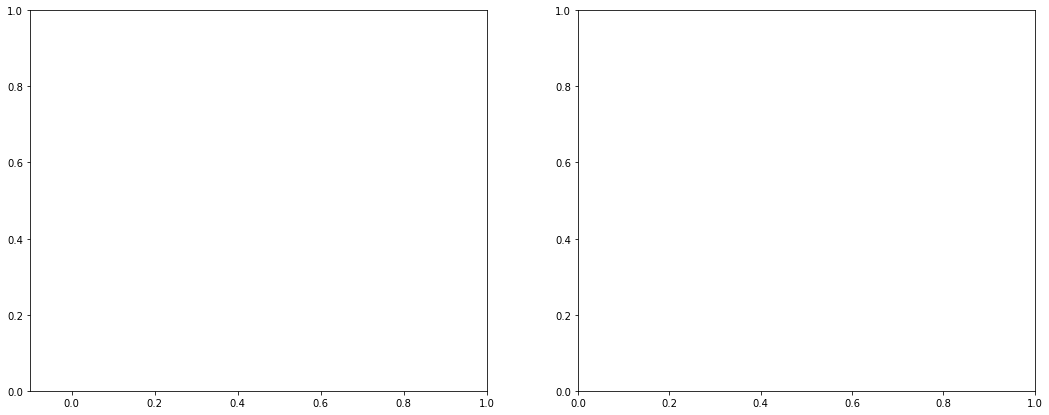

In [260]:
# 包装成一个大循环
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

for n_clusters in [2,3,4,5,6,7]:
    n_clusters = n_clusters
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper)
                          ,ith_cluster_silhouette_values
                          ,facecolor=color
                          ,alpha=0.7
                         )
        ax1.text(-0.05
                 , y_lower + 0.5 * size_cluster_i
                 , str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1]
                ,marker='o'
                ,s=8
                ,c=colors
               )
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='x',
                c="red", alpha=1, s=200)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()